# **Model_Transfer Learning 01** - **FINE TUNING** -  With data augmentation - Feature extraction 
Name: `Alberto Pingo` \
Email: `2202145`@my.ipleiria.pt 

Validation dataset: `train5` 

## Directories
This section sets up the directory paths used for training, validation, and test datasets based on the repository structure.

In [1]:
import os

current_dir = os.getcwd()

# TWO FOLDERS UP
data_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, 'data'))
test_dir = os.path.join(data_dir, 'test')
train_dir = os.path.join(data_dir, 'train')

train_dirs = []
for i in range(1, 5):
    train_dirs.append(os.path.join(train_dir, 'train' + str(i)))

validation_dir = os.path.join(data_dir, 'train', 'train5')

print(current_dir)
print(data_dir)
print(test_dir)
print(train_dir)
print(validation_dir)

/home/pws/code/IA-image-classification/notebooks/models-T
/home/pws/code/IA-image-classification/data
/home/pws/code/IA-image-classification/data/test
/home/pws/code/IA-image-classification/data/train
/home/pws/code/IA-image-classification/data/train/train5


## Preprocessing
Load the datasets and perform initial preprocessing. Images are resized to 32x32 pixels and batched.

In [2]:

from keras.utils import image_dataset_from_directory
import tensorflow as tf

# Load training datasets from train1 to train4
train_datasets = []
IMG_SIZE = 150
BATCH_SIZE = 32

for i in range(1, 5):
    dataset = image_dataset_from_directory(train_dirs[i-1], image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
    train_datasets.append(dataset)
 
train_dataset = train_datasets[0]
for dataset in train_datasets[1:]:
    train_dataset = train_dataset.concatenate(dataset)

validation_dataset = image_dataset_from_directory(validation_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')


test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')

class_names = validation_dataset.class_names
class_names = [class_name.split('_')[-1] for class_name in class_names]

print(class_names)

2024-06-22 22:57:13.920494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 22:57:13.920529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 22:57:13.921571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-22 22:57:13.927514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-22 22:57:14.634751: W tensorflow/compiler/tf2

Found 10000 files belonging to 10 classes.


2024-06-22 22:57:15.546875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-22 22:57:15.580079: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-22 22:57:15.580306: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


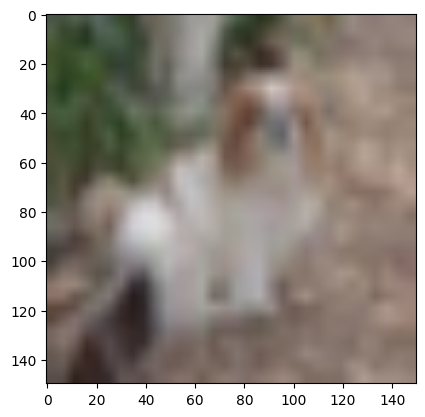

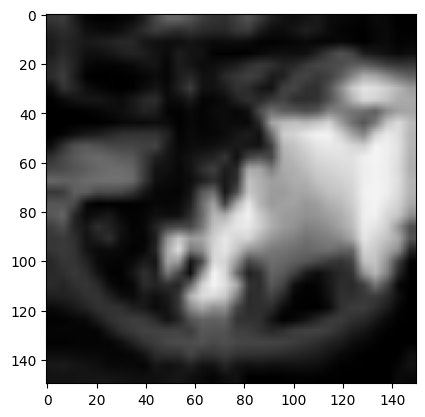

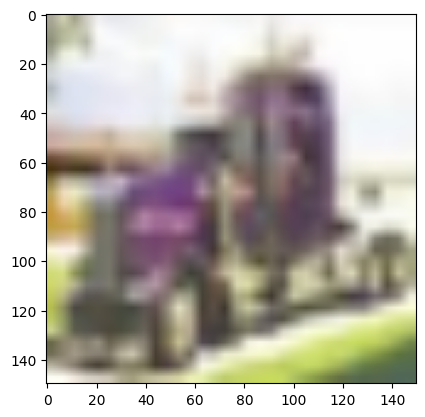

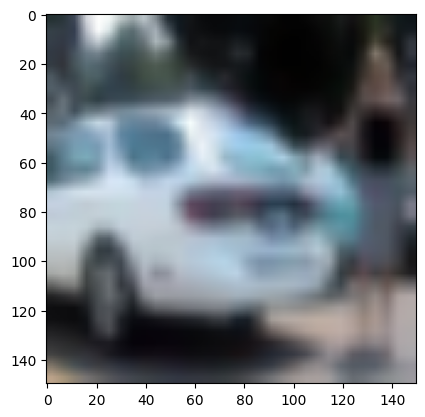

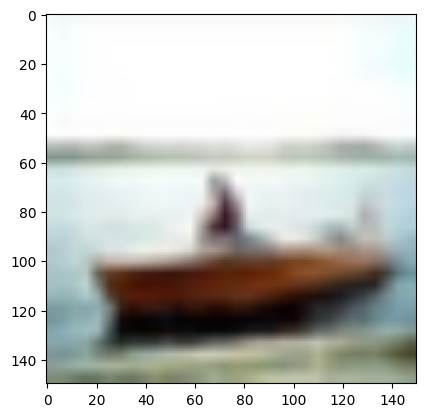

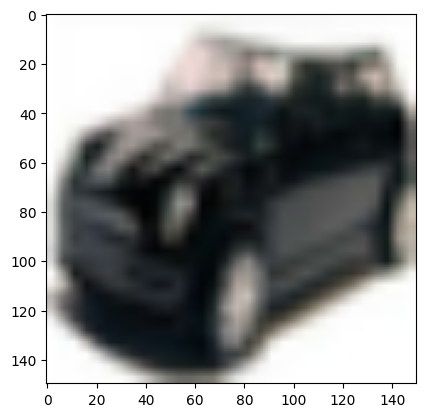

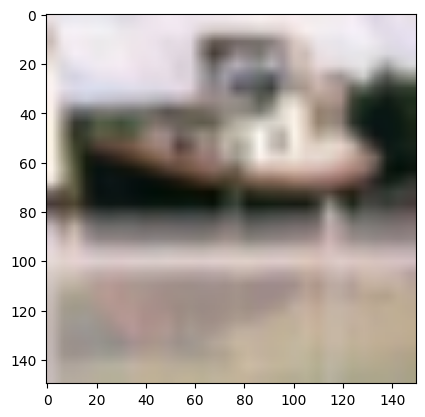

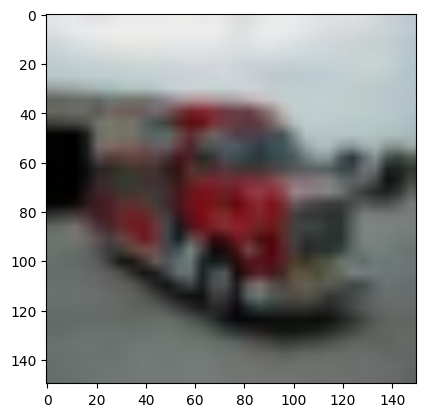

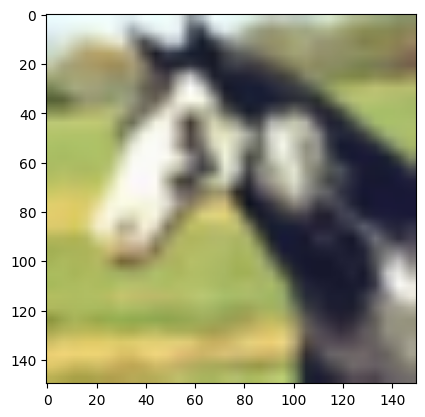

In [3]:
import matplotlib.pyplot as plt

for data, _ in train_dataset.take(1):
    for i in range(9):
        plt.imshow(data[i].numpy().astype('uint8'))
        plt.show()
    break

# **MODEL ARCHITECTURE**

## Transfer Learning Model

Use the extracted features to train a model for the classification task.

Use two dense layers with 256 neurons and a in-between dropout layer with a rate of 0.5.

In [4]:
from tensorflow import keras

model = keras.models.load_model('models/T01/T01-DA-model.h5')

val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

2024-06-22 22:57:19.983957: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


313/313 [==============================] - 41s 108ms/step - loss: 0.4452 - acc: 0.8609
val_acc: 0.8608999848365784


In [5]:
convbase = model.get_layer("vgg16")
convbase.trainable = True

# Unfreeze the last 4 layers
for layer in convbase.layers[:-4]:
    layer.trainable = False

for i, layer in enumerate(convbase.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


## Compile Model

**Loss function:** \
We use the *Categorical Crossentropy* loss function because it is a `multi-class classification` problem.

**Optimizer: RMSprop**

In [6]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    metrics=['acc'])

## Train Model
Train the model with Early stopping, Model checkpoint, and Learning rate reduction callbacks.

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=1e-6)

early_stop = EarlyStopping(monitor='val_acc', 
                           patience=4,
                           restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/T01/checkpoints/T01-FT-cp.h5', save_best_only=True)

history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=[early_stop, model_checkpoint, learning_rate_reduction])

Epoch 1/15


2024-06-22 22:58:03.177945: I external/local_xla/xla/service/service.cc:168] XLA service 0x7286146313b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-22 22:58:03.177973: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-06-22 22:58:03.182366: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719093483.216782   40791 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1252/1252 [==============================] - ETA: 0s - loss: 0.5934 - acc: 0.8244

/home/pws/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1252/1252 [==============================] - 190s 149ms/step - loss: 0.5934 - acc: 0.8244 - val_loss: 0.4177 - val_acc: 0.8748 - lr: 1.0000e-05
Epoch 2/15
1252/1252 [==============================] - 186s 148ms/step - loss: 0.5112 - acc: 0.8484 - val_loss: 0.3786 - val_acc: 0.8881 - lr: 1.0000e-05
Epoch 3/15
1252/1252 [==============================] - 186s 148ms/step - loss: 0.4537 - acc: 0.8629 - val_loss: 0.3533 - val_acc: 0.8963 - lr: 1.0000e-05
Epoch 4/15
1252/1252 [==============================] - 188s 150ms/step - loss: 0.4196 - acc: 0.8752 - val_loss: 0.3507 - val_acc: 0.8994 - lr: 1.0000e-05
Epoch 5/15
1252/1252 [==============================] - 188s 150ms/step - loss: 0.3913 - acc: 0.8826 - val_loss: 0.3380 - val_acc: 0.9049 - lr: 1.0000e-05
Epoch 6/15
1252/1252 [==============================] - 186s 148ms/step - loss: 0.3629 - acc: 0.8911 - val_loss: 0.3295 - val_acc: 0.9081 - lr: 1.0000e-05
Epoch 7/15
1252/1252 [==============================] - 186s 149ms/step - loss: 0

## Save Model

In [8]:
keras.models.save_model(model, 'models/T01/T01-FT-model.h5')

/tmp/ipykernel_40718/671286402.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, 'models/T01/T01-FT-model.h5')


## Load Model

In [9]:
keras.models.load_model('models/T01/T01-FT-model.h5')

# **EVALUATION**

## Evaluate the model on the validation dataset.

In [10]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 [==============================] - 30s 95ms/step - loss: 0.3863 - acc: 0.9192
val_acc: 0.9192000031471252


## Training and Validation Curves
Plot the training and validation accuracy and loss curves.

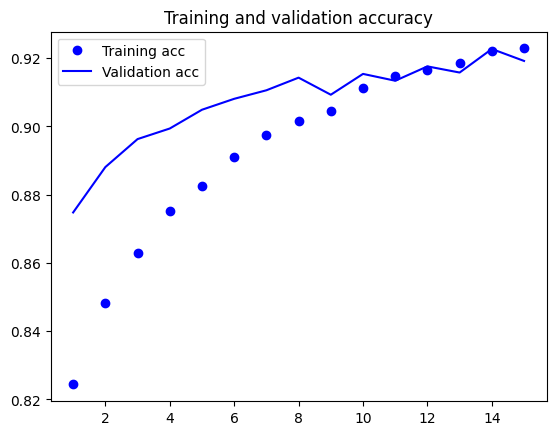

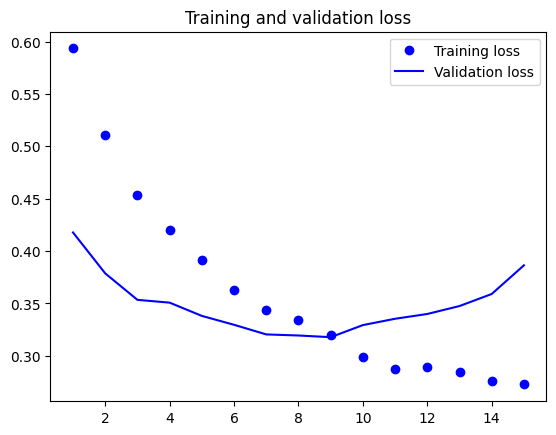

In [11]:
import matplotlib.pyplot as plt

# Extract the history from the training process
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot the training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Confusion Matrix

1/1 [==============================] - 0s 121ms/step


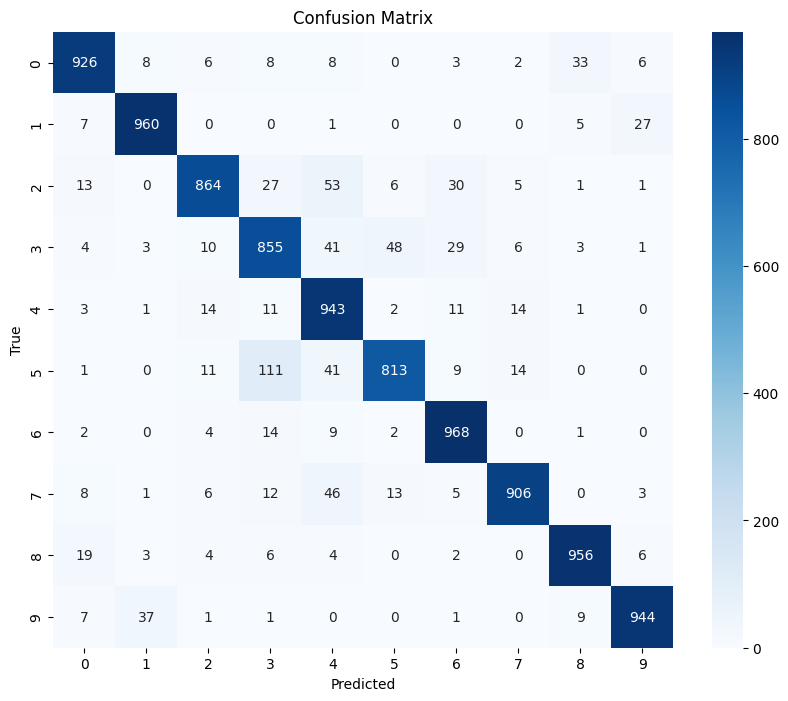

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for data, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(model.predict(data), axis=-1))
    
y_true = np.argmax(y_true, axis=-1)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.94      0.93      0.93      1000
  automobile       0.95      0.96      0.95      1000
        bird       0.94      0.86      0.90      1000
         cat       0.82      0.85      0.84      1000
        deer       0.82      0.94      0.88      1000
         dog       0.92      0.81      0.86      1000
        frog       0.91      0.97      0.94      1000
       horse       0.96      0.91      0.93      1000
        ship       0.95      0.96      0.95      1000
       truck       0.96      0.94      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



## Predictions

Predict and visualize the results for a sample image.

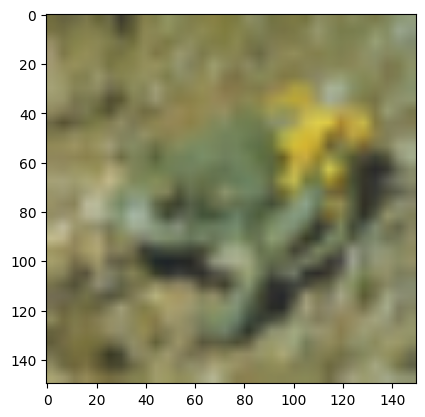

(1, 150, 150, 3)
1/1 [==============================] - 0s 36ms/step
Result:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load an image
img = tf.keras.preprocessing.image.load_img(train_dirs[0] + '/006_frog/alytes_obstetricans_s_000179.png', target_size=(150, 150), interpolation='bilinear')
# img = tf.keras.preprocessing.image.load_img(train_dirs[0] + '/000_airplane/airbus_s_000012.png', target_size=(32, 32), interpolation='bilinear')

# Preprocess the image
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

plt.imshow(img)
plt.show()

print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

# Results analysis

Fine-tuning the model with the extracted features from the pre-trained model has improved the validation accuracy really well. 
The model is now able to classify the images with a much high accuracy rate compared to the others Transfer Learning models and the From Scratch model, specially for this multi-class classification problem.

There is still room for improvement if given more epochs, but the model is performing well.
The scores for the 'cat' and 'deer' classs are still lower than the others, a pattern that has been seen in the other models as well.